<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prophet Model**
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from prophet import Prophet

In [ ]:
df3 = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')
df3.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
df3.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [ ]:
df = df3[['Date', 'Closing Price (USD)']]
df.head()

,Date,Closing Price (USD)
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [ ]:
df = df.rename(columns={'Date':'ds', 'Closing Price (USD)': 'y'})

In [ ]:
df.head()

,ds,y
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


<Axes: >

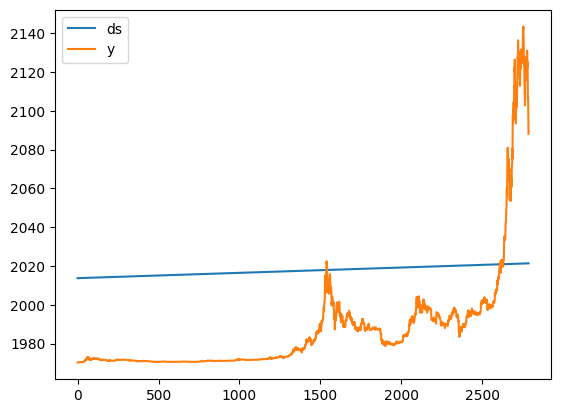

In [ ]:
df.plot()

In [ ]:
# Initialize and fit the prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4460vpj/57_sz76_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4460vpj/f1pxz076.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68234', 'data', 'file=/tmp/tmpe4460vpj/57_sz76_.json', 'init=/tmp/tmpe4460vpj/f1pxz076.json', 'output', 'file=/tmp/tmpe4460vpj/prophet_modelvswiooqj/prophet_model-20240806061447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Create a dataframe with future values
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3147,2022-05-14
3148,2022-05-15
3149,2022-05-16
3150,2022-05-17
3151,2022-05-18


In [ ]:
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


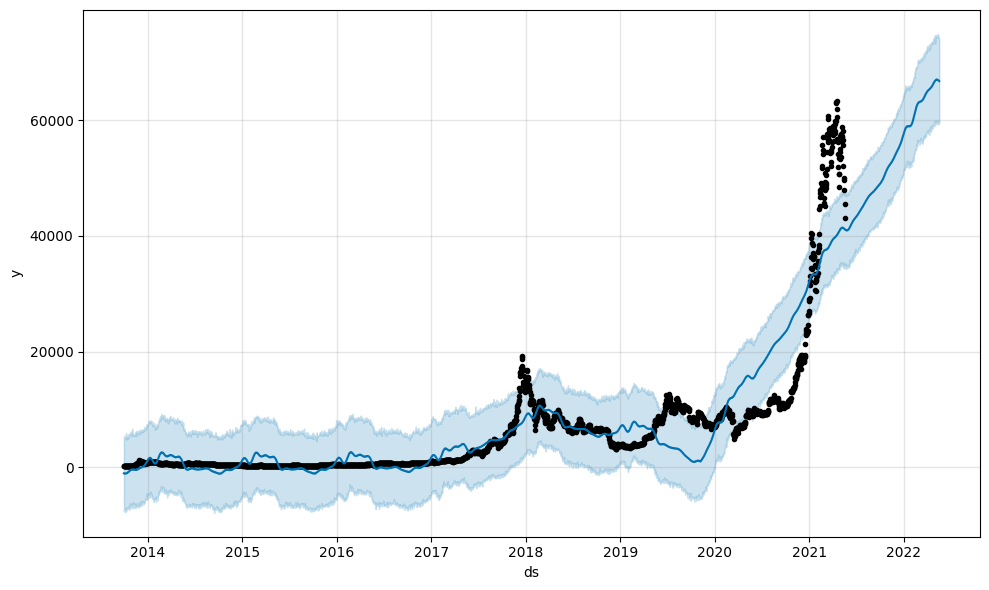

In [ ]:
# Plot the forecast
fig = model.plot(forecast)

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3147,2022-05-14,66974.899985,59266.087668,73906.351576
3148,2022-05-15,66947.995190,59285.045341,74091.802749
3149,2022-05-16,66870.676410,59162.719631,74141.641809
3150,2022-05-17,66838.472428,58834.849360,74341.611531
3151,2022-05-18,66788.525035,59019.789036,74494.581838


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


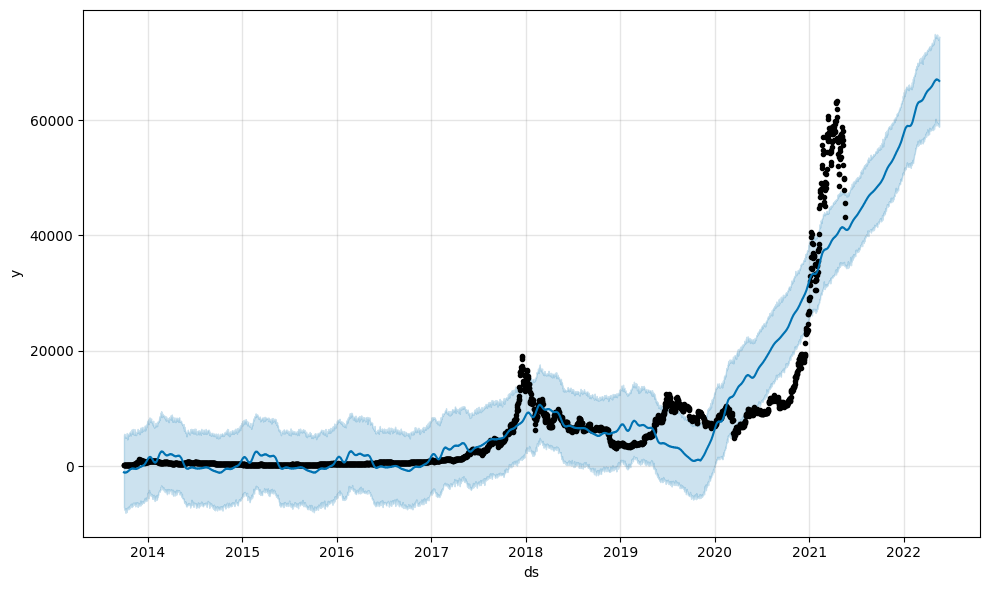

In [ ]:
fig = model.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

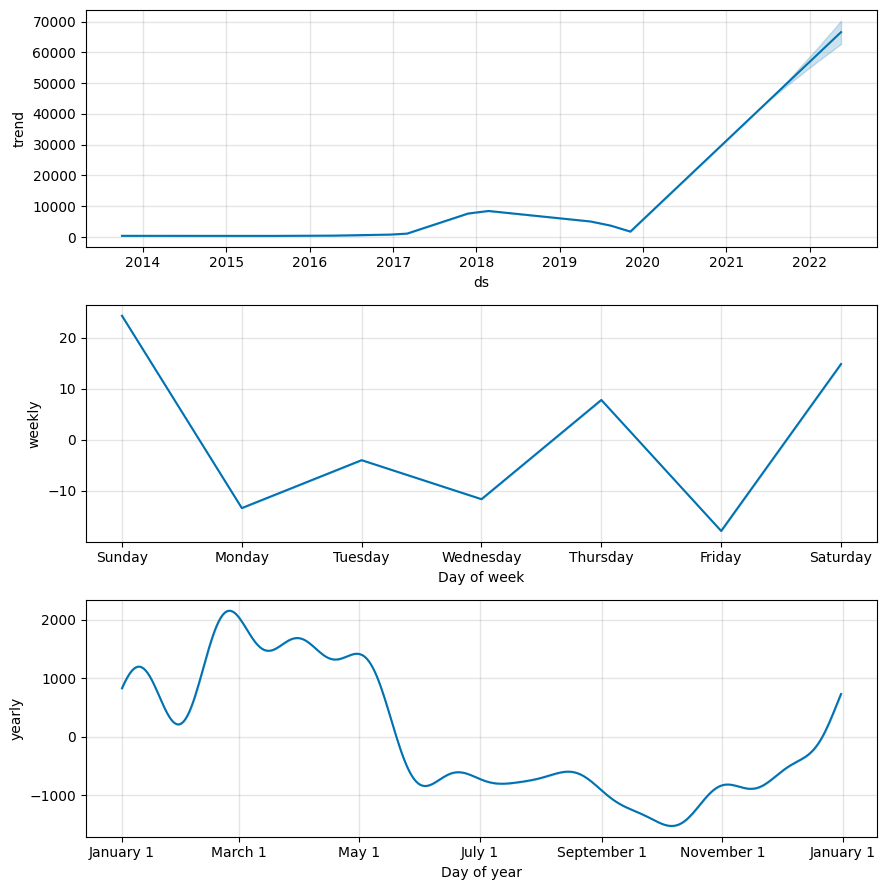

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
# Import the modules
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Prepare the data
df = df3[['Date', 'Closing Price (USD)']]
df = df.rename(columns = {'Date': 'ds', 'Closing Price (USD)': 'y'})
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [ ]:
# Initialize the prophet model
prophet_model = Prophet()
prophet_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4460vpj/3udwqc8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4460vpj/1zf_x1es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26970', 'data', 'file=/tmp/tmpe4460vpj/3udwqc8c.json', 'init=/tmp/tmpe4460vpj/1zf_x1es.json', 'output', 'file=/tmp/tmpe4460vpj/prophet_models5lp4keq/prophet_model-20240806061501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create the df with future values
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

In [ ]:
# Merge the forecasted values
df = df.merge(forecast[['ds', 'yhat']], on='ds', how='left')
df.rename(columns={'yhat' : 'prophet_forecast'}, inplace = True)
df.head()

,ds,y,prophet_forecast
0,2013-10-01,123.65499,-1081.498151
1,2013-10-02,125.45500,-1102.133156
2,2013-10-03,108.58483,-1093.654392
3,2013-10-04,118.67466,-1127.921324
4,2013-10-05,121.33866,-1100.998938


In [ ]:
# fill any missing values ffill
df['prophet_forecast'].fillna(method='ffill', inplace=True)

<ipython-input-22-9f0335c733cf>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prophet_forecast'].fillna(method='ffill', inplace=True)


In [ ]:
# define a function to make ARIMA Prediction
def arima_forecast(train, periods):
  model = ARIMA(train, order=(5, 1, 0))
  model_fit = model.fit()
  forecast = model_fit.forecast(steps = periods)
  return forecast

In [ ]:
df.head()

,ds,y,prophet_forecast
0,2013-10-01,123.65499,-1081.498151
1,2013-10-02,125.45500,-1102.133156
2,2013-10-03,108.58483,-1093.654392
3,2013-10-04,118.67466,-1127.921324
4,2013-10-05,121.33866,-1100.998938


In [ ]:
arima_data = df[['ds', 'y']]
arima_data = arima_data.set_index('ds')['y']
arima_data.head()

ds
2013-10-01    123.65499
2013-10-02    125.45500
2013-10-03    108.58483
2013-10-04    118.67466
2013-10-05    121.33866
Name: y, dtype: float64

In [ ]:
arima_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Series name: y
Non-Null Count  Dtype  
--------------  -----  
2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


In [ ]:
# Create a new column for the ARIMA prediction
df['arima_pred'] = arima_forecast(arima_data[:-365], 365)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
df.head()

,ds,y,prophet_forecast,arima_pred
0,2013-10-01,123.65499,-1081.498151,NaN
1,2013-10-02,125.45500,-1102.133156,NaN
2,2013-10-03,108.58483,-1093.654392,NaN
3,2013-10-04,118.67466,-1127.921324,NaN
4,2013-10-05,121.33866,-1100.998938,NaN


In [ ]:
# Define the base models
prophet_model = Prophet()
arima_model = LinearRegression()

In [ ]:
# Fit the prophet model
prophet_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4460vpj/r0_6n7tu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe4460vpj/i5mre0kj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10593', 'data', 'file=/tmp/tmpe4460vpj/r0_6n7tu.json', 'init=/tmp/tmpe4460vpj/i5mre0kj.json', 'output', 'file=/tmp/tmpe4460vpj/prophet_modeluvcveeb3/prophet_model-20240806062946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict with the prophet model
future = prophet_model.make_future_dataframe(periods= 365)
forecast = prophet_model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-01,402.720877,-7553.444873,5448.932425,402.720877,402.720877,-1484.219028,-1484.219028,-1484.219028,-4.004839,-4.004839,-4.004839,-1480.214189,-1480.214189,-1480.214189,0.0,0.0,0.0,-1081.498151
1,2013-10-02,402.643217,-7407.129635,5129.431488,402.643217,402.643217,-1504.776373,-1504.776373,-1504.776373,-11.655158,-11.655158,-11.655158,-1493.121215,-1493.121215,-1493.121215,0.0,0.0,0.0,-1102.133156
2,2013-10-03,402.565557,-7602.100299,4849.763445,402.565557,402.565557,-1496.219949,-1496.219949,-1496.219949,7.801480,7.801480,7.801480,-1504.021429,-1504.021429,-1504.021429,0.0,0.0,0.0,-1093.654392
3,2013-10-04,402.487897,-7360.455637,5110.969291,402.487897,402.487897,-1530.409221,-1530.409221,-1530.409221,-17.887246,-17.887246,-17.887246,-1512.521975,-1512.521975,-1512.521975,0.0,0.0,0.0,-1127.921324
4,2013-10-05,402.410237,-6785.955543,5070.141232,402.410237,402.410237,-1503.409175,-1503.409175,-1503.409175,14.837405,14.837405,14.837405,-1518.246580,-1518.246580,-1518.246580,0.0,0.0,0.0,-1100.998938


In [ ]:
df.head()

,ds,y,prophet_forecast,arima_pred
0,2013-10-01,123.65499,-1081.498151,NaN
1,2013-10-02,125.45500,-1102.133156,NaN
2,2013-10-03,108.58483,-1093.654392,NaN
3,2013-10-04,118.67466,-1127.921324,NaN
4,2013-10-05,121.33866,-1100.998938,NaN


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Stacking of the models
estimators = [('lr', LinearRegression()),
             ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))]
stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

In [ ]:
stacked_model.fit(df[['y', 'arima_pred']], df['y'])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values